In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
score_data = pd.read_csv("score_data.csv")

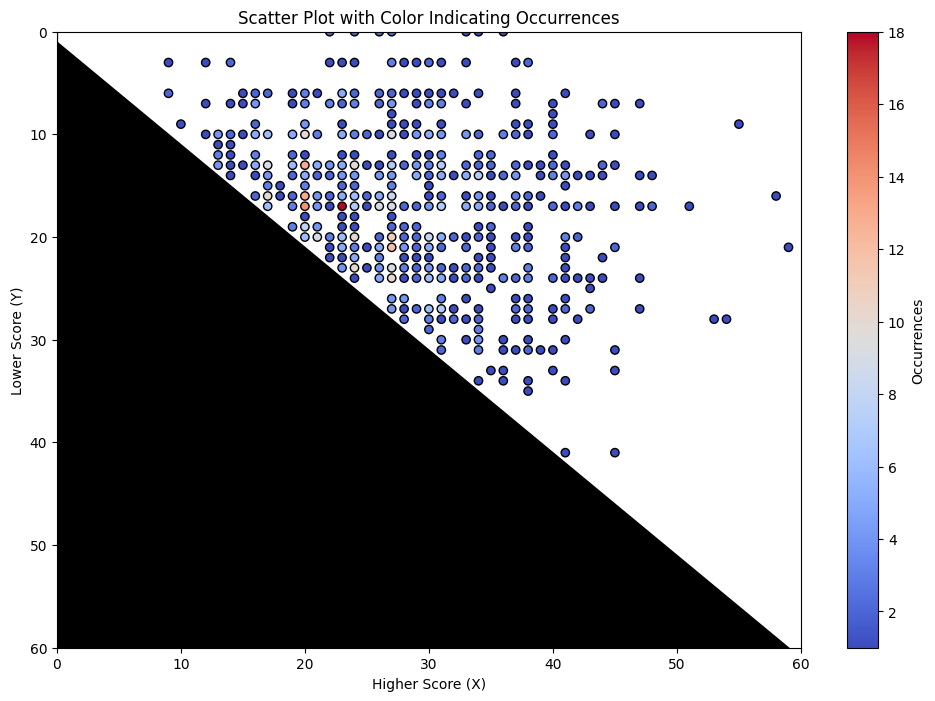

In [13]:
# Ensure higher score is always on the x-axis
score_data['X'] = score_data[['Score1', 'Score2']].max(axis=1)
score_data['Y'] = score_data[['Score1', 'Score2']].min(axis=1)

# Count occurrences
score_counts = score_data.groupby(['X', 'Y']).size().reset_index(name='Count')

# Create plot with fixed axis limits [0,60] by [0,60]
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    score_counts['X'], 
    score_counts['Y'], 
    c=score_counts['Count'],  # Color based on occurrences
    cmap='coolwarm',  # Colormap
    edgecolors='black'
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Occurrences")

# Labels and title
plt.title("Scatter Plot with Color Indicating Occurrences")
plt.xlabel("Higher Score (X)")
plt.ylabel("Lower Score (Y)")

# Set axis limits
plt.xlim(0, 60)
plt.ylim(0, 60)

# Invert Y-axis
plt.gca().invert_yaxis()

# Fill lower left triangle where Y > X with black
x = np.linspace(0, 60, 60)

plt.gca().fill_betweenx(x, 0, x-1, color='black', alpha=1)

# Show plot
plt.show()

In [14]:
scms = score_counts.sort_values(by='Count', ascending=False)

print(scms)

      X   Y  Count
88   23  17     18
56   20  17     14
52   20  13     13
55   20  16     13
148  27  21     12
..   ..  ..    ...
224  32  23      1
225  32  24      1
226  32  27      1
228  33   0      1
386  66  27      1

[387 rows x 3 columns]


In [15]:
print((np.mean(score_counts['X']) + np.mean(score_counts['Y']))/2.0)

23.454780361757106
